In [2]:
# Loaded needed libraries 
import csv
import numpy as np
from matplotlib import pyplot as plt
import pickle
import pandas as pd
import seaborn as sns
import os

if not os.path.exists(os.path.join("Supplemental_Figures", "Clinical_Attributes")):
    os.mkdir(os.path.join("Supplemental_Figures", "Clinical_Attributes"))

 ---- OUTCOMES ---- 


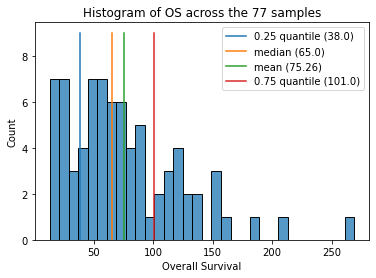

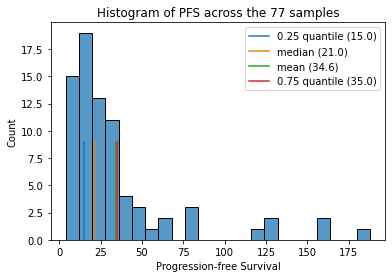

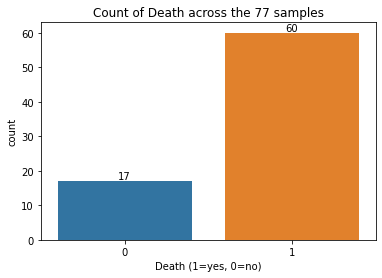

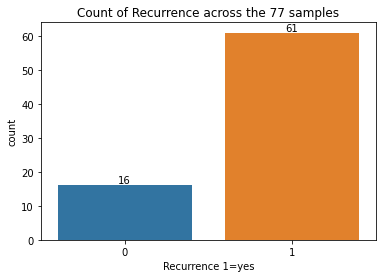

 ---- CLINICAL ATTRIBUTES ---- 


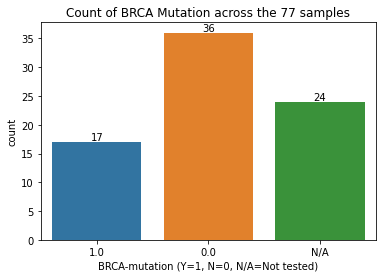

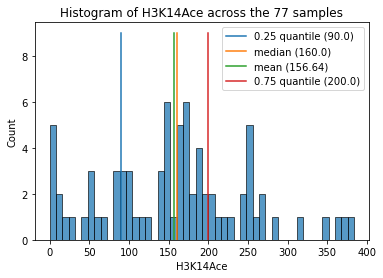

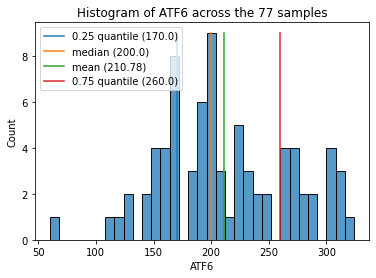

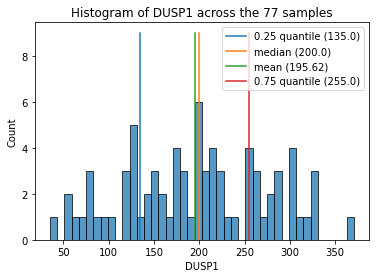

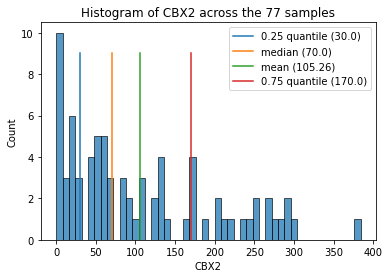

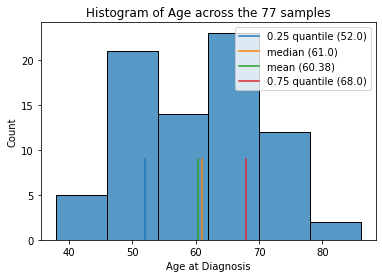

In [6]:
## Outcome and clinical/immunohistochemical feature distributions across included samples

DATA_FILE = os.path.join('Data','tma_info.csv')
df = pd.read_csv(DATA_FILE)
df = df[df["Included"]==1]

def column_histogram(name,display_name,df):
    plt.title(f"Histogram of {display_name} across the {len(df)} samples")
    sns.histplot(data=df[name],binwidth=8)
    plt.plot([np.quantile(df[name],0.25)]*2,[0,9],label=f'0.25 quantile ({np.quantile(df[name],0.25)})')
    plt.plot([np.quantile(df[name],0.5)]*2,[0,9],label=f'median ({np.quantile(df[name],0.5)})')
    plt.plot([np.mean(df[name])]*2,[0,9],label=f'mean ({round(np.mean(df[name]),2)})')
    plt.plot([np.quantile(df[name],0.75)]*2,[0,9],label=f'0.75 quantile ({np.quantile(df[name],0.75)})')
    plt.legend()
    plt.savefig(os.path.join('Supplemental_Figures','Clinical_Attributes',f'{display_name}_histogram.png'),dpi=1000,bbox_inches='tight')
    plt.show()

def column_counts(name,display_name,df):
    plt.title(f"Count of {display_name} across the {len(df)} samples")
    ax = sns.countplot(x=df[name].fillna('N/A'))
    ax.bar_label(ax.containers[0])
    plt.savefig(os.path.join("Supplemental_Figures","Clinical_Attributes",f"{display_name}_counts.png"),dpi=1000,bbox_inches='tight')
    plt.show()

    
print(" ---- OUTCOMES ---- ")

column_histogram("Overall Survival","OS",df)
column_histogram("Progression-free Survival","PFS",df)
column_counts("Death (1=yes, 0=no)","Death",df)
column_counts("Recurrence 1=yes","Recurrence",df)

print(" ---- CLINICAL ATTRIBUTES ---- ")

column_counts("BRCA-mutation (Y=1, N=0, N/A=Not tested)","BRCA Mutation",df)
column_histogram("H3K14Ace","H3K14Ace",df)
column_histogram("ATF6","ATF6",df)
column_histogram("DUSP1","DUSP1",df)
column_histogram("CBX2","CBX2",df)
column_histogram("Age at Diagnosis","Age",df)